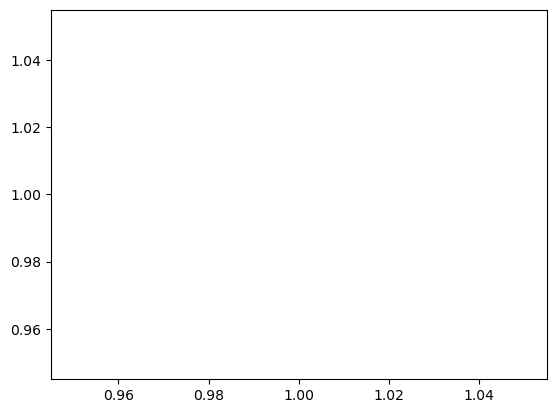

In [1]:
import matplotlib.pyplot as plt
#%matplotlib ipympl
%matplotlib inline
plt.plot(1,1)

In [2]:
from ML_Dataset_Model import *
from ML_Functions import *
from Ariel_Functions import *
import scipy
import numpy as np
import pandas as pd

import h5py
import os
from tqdm import tqdm
from time import time
import scipy
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
torch.set_default_dtype(torch.float64)

In [3]:
N= 21988

N= 21988



path_np = 'np_data'

# path = 'TrainingData'
# test_matrix = to_observed_matrix(h5py.File( os.path.join( path,'SpectralData.hdf5'),'r') ,pd.read_csv( os.path.join( path,'AuxillaryTable.csv')))[:N]
# spec_tr = torch.Tensor(test_matrix[:,:,1])
# noise = torch.Tensor(test_matrix[:,:,2])
# aux_tr = torch.Tensor(pd.read_csv( os.path.join( path,'AuxillaryTable.csv')).drop(pd.read_csv( os.path.join( path,'AuxillaryTable.csv')).columns[:1],axis=1).values)[:N]
# quart_tr = torch.Tensor(load_Quartile_Table( os.path.join( path,'QuartilesTable.csv'))[:N])
# del test_matrix

# Loads the data using numpy files from path, comment the block and uncomment the previous block to use the training data in the original
# format, assuming AuxillaryTable,QuartilesTable, SpectralData are all in a folder named TrainingData



with np.load(os.path.join(path_np,'all_training.npz')) as data:
    spec_tr = torch.Tensor(data['spec_tr'])[:N]
    noise = torch.Tensor(data['noise'])[:N]
    aux_tr = torch.Tensor(data['aux_tr'])[:N]
    soft_tr = torch.Tensor(data['FM'])[:N]
    quart_tr = torch.Tensor(data['quart_tr'])

    

In [4]:
torch.manual_seed(0)
# Train_test splitter, tr_ratio determines training_samples to total samples ratio. Set to 1 before training for the 
# final submission
tr_ratio= 1
uniq = torch.unique(aux_tr,dim=0)
indd = torch.rand(uniq.shape[0])<tr_ratio
ind  = torch.ones(aux_tr.shape[0])==1

for i in range(uniq[~indd].shape[0]):
    a = torch.where( torch.eq(torch.broadcast_to(uniq[indd][i],aux_tr.shape),aux_tr).sum(axis=1) ==9 )[0]
    ind[a]=False


In [5]:
spec_tr,aux_tr,noise,Tr,std_mn = preprocessor(spec_tr,aux_tr,noise,ind=ind)
aux_std,aux_mn = std_mn
quart_mn,quart_std = quart_tr[ind,:,1:].mean(axis=0),quart_tr[ind,:,1:].std(axis=0)

In [6]:
train_data = Combined_Quart_Dataset(spectra=spec_tr[ind],aux=aux_tr[ind],quart=quart_tr[ind][:,:,1:],noise=noise[ind])
train_loader = DataLoader(train_data, batch_size=64,shuffle=True, num_workers=0)

if not(ind.all()):
    
    test_data = Combined_Quart_Dataset(spectra=spec_tr[~ind],aux=aux_tr[~ind],quart=quart_tr[~ind][:,:,1:],noise=noise[~ind])

else:
    
    test_data=train_data
    
test_loader = DataLoader(test_data, batch_size=64,shuffle=True, num_workers=0)

In [7]:
model=Combined_QuartM_ML(quart_mn,quart_std,Dropout=0.2)

In [8]:
loss_fn = lambda yhat,y: torch.nn.MSELoss(reduction='none')(yhat/y,torch.ones(y.shape))
params={'model':model ,
      'loss_fn':loss_fn ,
      'train_dl':train_loader,
      'val_dl':test_loader,
      'device':'cpu'}

a=train(**params,epochs=np.array([10,15,40]),lrs=np.array([8e-4,4e-4,2e-4]))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

Time total: 461.36 sec, Best Val. Loss:4.085961179747004


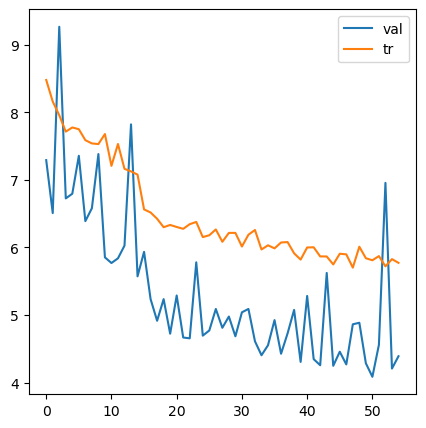

In [26]:
# Plot the value loss and training loss.

plt.figure(figsize=(5,5))
plt.plot(a['history']['val_loss'][10:],label='val')
plt.plot(a['history']['loss'][10:],label='tr')
plt.legend()

In [21]:
# Load the final data 

path_final  = 'final'
test_matrix = to_observed_matrix(h5py.File(os.path.join(path_final,'SpectralData.hdf5'),'r'),
                                           pd.read_csv(os.path.join(path_final,'AuxillaryTable.csv')))
spec_test = torch.Tensor(test_matrix[:,:,1])
noise_test = torch.Tensor(test_matrix[:,:,2])
aux_test = torch.Tensor(pd.read_csv(os.path.join(path_final,'AuxillaryTable.csv')).drop(pd.read_csv(os.path.join(path_final,'AuxillaryTable.csv')).columns[:2],axis=1).values)

In [17]:
# Load the data challenge test data (not the final data)

# with np.load(os.path.join(path_np, 'all_testing.npz') ) as data:
#     spec_test = torch.Tensor(data['spec_test'])
#     noise_test = torch.Tensor(data['noise_test'])
#     aux_test = torch.Tensor(data['aux_test'])

In [22]:
# Preprocessing the final/test data
spec_test, aux_test ,noise_test ,T,std_mn = preprocessor(spec_test ,aux_test ,noise_test ,std_mn=std_mn)

In [23]:
# Evaluation and Submission
model.eval()

y = np.zeros((spec_test.shape[0],3,6))

with torch.no_grad():
    y[:,:,1:] = model(spec_test,aux_test,noise_test)

y[:,0,0] = T*0.9865
y[:,1,0] = T
y[:,2,0] = T*1.016
y = np.array(y)

y.sort(axis=1)
y[y<-12]=-12
y[np.logical_and(y>-1,y<0)]=-1

all_q1_pred, all_q2_pred, all_q3_pred = y[:,0,:],y[:,1,:],y[:,2,:]
LT_submission = to_light_track_format(all_q1_pred, all_q2_pred, all_q3_pred)


  0%|          | 0/2497 [00:00<?, ?it/s]

In [25]:
#Comparison with the final/test submission
y2=load_Quartile_Table('gators_LT_submission_v1.csv')
# y2=load_Quartile_Table('LT_submission_best2.csv')
light_track_metric(y2[:,:,:],y[:,:,:])

score is: 999.9999999995556


999.9999999995556

In [15]:
np.round(y.min(axis=0).T,3)[1:,:]

array([[-12.   ,  -9.882,  -8.15 ],
       [-12.   , -10.688,  -8.806],
       [-12.   , -12.   ,  -8.814],
       [-12.   ,  -9.947,  -7.364],
       [-12.   , -12.   , -10.271]])

In [16]:
np.round(y.max(axis=0).T,3)[1:,:]

array([[-2.115, -2.077, -2.   ],
       [-3.832, -3.816, -3.712],
       [-2.751, -2.686, -2.628],
       [-1.015, -1.   , -1.   ],
       [-3.977, -3.908, -3.801]])

In [17]:
quart_tr.min(axis=0).values.T[1:,:]

tensor([[-11.4255, -10.1077,  -8.7256],
        [-11.6930, -11.0610, -10.3832],
        [-11.4537, -10.3740,  -9.1281],
        [-10.9978,  -8.6282,  -6.3577],
        [-11.4419, -10.0699,  -9.8051]])

In [18]:
quart_tr.max(axis=0).values[:,1:].T

tensor([[-2.9963, -2.8414, -2.5442],
        [-4.0268, -3.9090, -3.4448],
        [-3.0258, -2.9767, -2.7893],
        [-1.3304, -1.3304, -1.3303],
        [-4.0107, -3.9680, -3.7179]])